# 2. Regresion lineal B. Anlálisis de calidad en muestras de vino

En este documento se pretende analizar la linealidad de los datos presentados como posibles parámetros para el análisis de la calidad de modelos de vino, calificaciones anteriormente.

Se importan las librerias destinadas para la visualización y análisis de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Extracción de datos y primer análisis gráfico

Se utilizará la libreria Pandas como medio para analizar los datos, puesto que tiene herramientas para filtrar datos imcompletos, visuales, y porque los dataframes son formatos de datos aceptables de entrada para los modelos de aprendizaje que se aplicarán a continuación.

In [2]:
df = pd.read_csv('files/winequality-red.csv', sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.shape

(1599, 12)

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

De estos métodos llamados, se puede concluir lo siguiente:

- Son 1599 muestras de vino analizadas
- Se recuperaron 11 parámetros medidos desde una perspectiva química
- De acuerdo a la caracterización de los datos o pesos, todos los parámetros medidos se tienen como numeración flotante-decimal de 64 bit
- Los datos de salida, que es una variable llamada calidad 'quality' son valores numéricos de tipo entero de 64 bit

Posteriormente se presentan histogramas para analizar el comportamiento de los datos obtenidos, tanto los parámetros medidos como su calificación

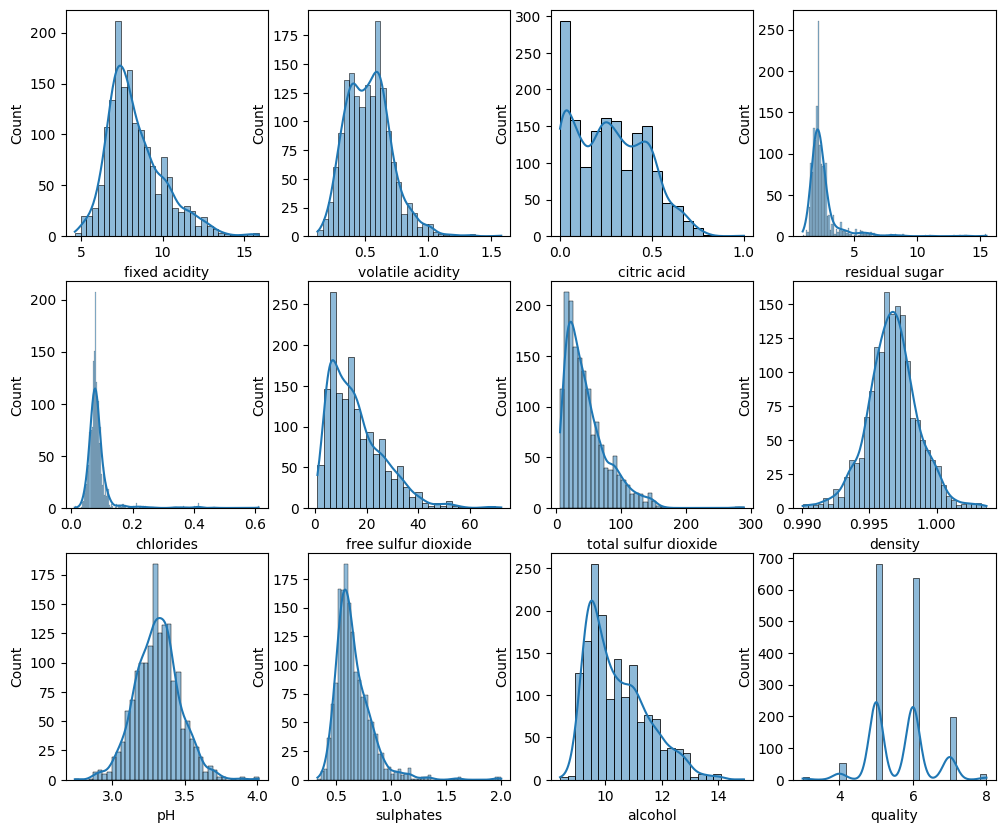

In [6]:
plt.figure(figsize=(12, 10))
col = df.columns
for i in range(len(df.columns)):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col[i]], kde=True)
plt.show()

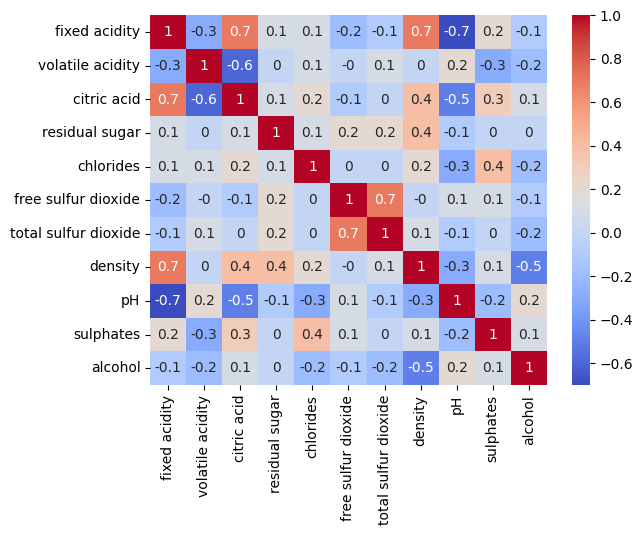

In [7]:
attrib = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
corrMatrix = df[attrib].corr().round(1)
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

## 2. Preparación de los datos para el entrenamiento

In [8]:
#Revisar y eliminar datos  perdidos NaN
df.isnull().values.any()

False

Como no hay ningun dato faltante o con valor nulo/vacio, se realiza la selección de datos, separando los pesos de la variable dependiente o de predicción.

In [9]:
X = df.drop('quality', axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
y = df.quality
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Se usa la herramienta de train_test_split para una separación automática de los datos para entrenamiento y prueba.

In [11]:
# Se dividen los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

In [12]:
# Se revisa el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1359, 11), (240, 11), (1359,), (240,))

## 3. Preparación de los modelos

De acuerdo con las indicaciones del proyecto, se invocarán tres modelos de regressión, una del tipo lineal y dos polinomiales, de grado dos y tres respectivamente.

Si bien el modelo de regresión lineal simple que contiene la libraría sklearn es muy parecido y ofrece resultados casi similares a los algoritmos del descenso de gradiente realizados para el proyecto anterior, para la regresión polinomial requiere preparar los datos de diferente manera:

El módulo `sklearn.pipeline` es un transformador de datos que prepara ciertos datos no numéricos y que ofrece la facilidad de aplicar directamente modelos de predicción de la misma librería.

Se puede obervar en la ilustración siguiente un ejemplo al transformar datos categóricos y numéricos, los cuales se transformarán al formato correcto del modelo insertado.

<img src="media/pipeline_s.jpg" alt="pipeline scheme" width="400" height="400">

Una ventaja de sobreescribir unos datos a modelo polinomiales es la facilidad de consultar datos de prueba, ya que el modelo `polynomial features` no contiene las mismas facilidades de prueba directa como la regresión lineal simple.

### Regresión lineal

In [13]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

### Regresión polinomial

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_reg_2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_reg_3 = make_pipeline(PolynomialFeatures(3), LinearRegression())

## 4. Entrenamiento de los modelos

In [15]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [16]:
poly_reg_2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [17]:
poly_reg_3.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

## 5. Evaluación de resultados

Para conservar el formato de los datos de salida, se redondea al entero más cercano, usando parte de la librería numpy.

In [18]:
y_linear_predicted = linear_regression.predict(X_test).round()
y_poly2_predicted = poly_reg_2.predict(X_test).round().round()
y_poly3_predicted = poly_reg_3.predict(X_test).round().round()

In [19]:
from sklearn import metrics

In [20]:
lineal_error = metrics.mean_absolute_error(y_test, y_linear_predicted)
poly2_error = metrics.mean_absolute_error(y_test, y_poly2_predicted)
poly3_error = metrics.mean_absolute_error(y_test, y_poly3_predicted)

In [27]:
print(lineal_error.round(3))
print(poly2_error.round(3))
print(poly3_error.round(3))

0.425
0.388
0.417


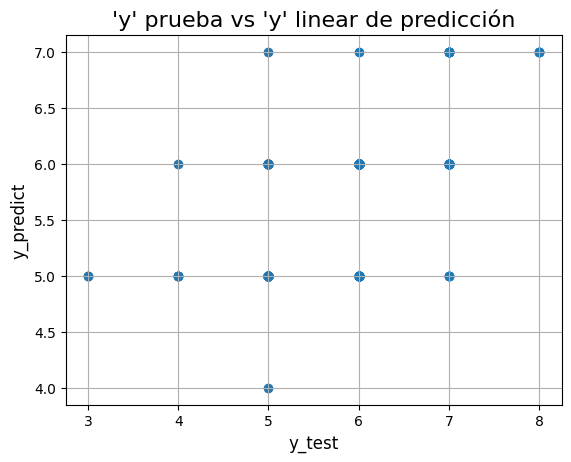

In [34]:
plt.scatter(y_test, y_linear_predicted)
plt.xlabel('y_test', fontsize = 12)
plt.ylabel("y_predict", fontsize = 12, rotation = 90)
plt.title("'y' prueba vs 'y' linear de predicción", fontsize=16)
#plt.legend(loc = "upper le*ft", fontsize = 11)
plt.grid(True)
plt.show()

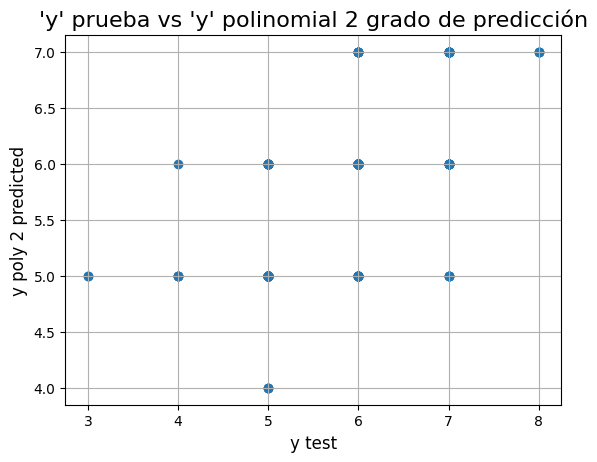

In [35]:
plt.scatter(y_test, y_poly2_predicted)
plt.xlabel('y test', fontsize = 12)
plt.ylabel("y poly 2 predicted", fontsize = 12, rotation = 90)
plt.title("'y' prueba vs 'y' polinomial 2 grado de predicción", fontsize=16)


#plt.legend(loc = "upper left", fontsize = 11)
plt.grid(True)
plt.show()

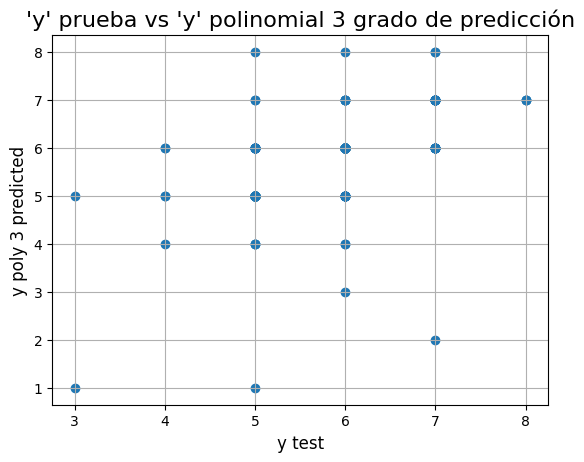

In [36]:
plt.scatter(y_test, y_poly3_predicted)
plt.xlabel('y test', fontsize = 12)
plt.ylabel("y poly 3 predicted", fontsize = 12, rotation = 90)
#plt.legend(loc = "upper left", fontsize = 11)
plt.title("'y' prueba vs 'y' polinomial 3 grado de predicción", fontsize=16)
plt.grid(True)
plt.show()

## Conclusiones

De los tres modelos se puede concluir que el modelo de regresión polinomial de grado 3 es la mejor a nivel gáfico debido a un primer análisis de correlación, y analizando el error ya por numeración se observa que el error promedio bajo raíz cuadrada tiene como menor tambien la poinomial 3. 

Al final el mejor modelo de anlálisis es el polinomial de grado 3.